In [1]:
import numpy as np
from scipy import stats
import math
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import sys
from haversine import haversine
import pandas as pd
import geopandas as gpd

In [3]:
# read in clusters_q1.geojson  and  clusters_q2.geojson and  clusters_q3.geojson  and  clusters_q4.geojson
# read in clusters_q1.geojson
clusters_q1 = gpd.read_file('data/clusters_q1.geojson')

# read in clusters_q2.geojson
clusters_q2 = gpd.read_file('data/clusters_q2.geojson')

# read in clusters_q3.geojson
clusters_q3 = gpd.read_file('data/clusters_q3.geojson')

# read in clusters_q4.geojson
clusters_q4 = gpd.read_file('data/clusters_q4.geojson')


In [4]:
#concact all the clusters together
clusters = pd.concat([clusters_q1, clusters_q2, clusters_q3, clusters_q4])

In [7]:
print(clusters['clustered'].unique())

[False  True]


In [8]:
#select only label id and clustered
clusters = clusters[['label_id', 'clustered']]
clusters.head()

,label_id,clustered
0,33,False
1,34,True
2,35,True
3,36,True
4,37,True


In [10]:
#read in the labesl.csv
labels = pd.read_csv('data/labels.csv')

In [13]:
#dro the cluster column
labels = labels.drop(columns=['clustered'])

In [15]:
#merge the labels and clusters on label_id
labels = labels.merge(clusters, on='label_id', how='left')

In [16]:
labels

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,...,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry,clustered
0,18604,85055,CurbRamp,1.0,NaN,False,NjPAkwTxWsayAq3kCugvdA,0,0,0,...,107.750000,-15.62500,270.556610,0.907036,0.0,0.0,-162.806610,-16.532036,POINT (-122.3327865600586 47.61859893798828),NaN
1,18608,85057,Obstacle,2.0,1.0,False,f_Mibt-6nJU7HTN7kx5ZGQ,2,0,0,...,38.375000,-21.87500,164.133438,0.335564,0.0,0.0,-125.758438,-22.210564,POINT (-122.3318862915039 47.61780548095703),False
2,18608,85059,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,131.187500,-24.50000,164.133438,0.335564,0.0,0.0,-32.945938,-24.835564,POINT (-122.33183288574219 47.61751174926758),NaN
3,18608,85060,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,131.187500,-24.50000,164.133438,0.335564,0.0,0.0,-32.945938,-24.835564,POINT (-122.33187866210938 47.61751937866211),NaN
4,18608,85062,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,257.187500,-35.00000,164.133438,0.335564,0.0,0.0,93.054062,-35.335564,POINT (-122.33204650878906 47.617637634277344),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196809,76181,231270,CurbRamp,1.0,NaN,True,R-sTl5O6sOdVPurgTWy3EQ,0,0,0,...,332.468750,-35.00000,215.130295,-0.157570,0.0,0.0,117.338455,-34.842430,POINT (-122.26725769042969 47.540771484375),NaN
196810,76183,231285,NoSidewalk,5.0,NaN,True,N5MrAAtHZO2JGXUrYAYnSQ,0,0,0,...,0.890625,-11.65625,179.161057,-5.825714,0.0,0.0,-178.270432,-5.830536,POINT (-122.26344299316406 47.55229187011719),NaN
196811,76193,231338,CurbRamp,1.0,NaN,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,...,253.562500,-35.00000,177.959915,-0.962440,0.0,0.0,75.602585,-34.037560,POINT (-122.28179168701172 47.563270568847656),False
196812,76193,231339,CurbRamp,1.0,NaN,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,...,110.312500,-35.00000,179.365723,-1.093400,0.0,0.0,-69.053223,-33.906600,POINT (-122.28165435791016 47.56346893310547),False


In [19]:
#fill the nan values with -1 for clustered 
labels['clustered'] = labels['clustered'].fillna(-1)
#change false to 0 and true to 1
labels['clustered'] = labels['clustered'].replace({False: 0, True: 1})

In [20]:
labels

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,...,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry,clustered
0,18604,85055,CurbRamp,1.0,NaN,False,NjPAkwTxWsayAq3kCugvdA,0,0,0,...,107.750000,-15.62500,270.556610,0.907036,0.0,0.0,-162.806610,-16.532036,POINT (-122.3327865600586 47.61859893798828),-1
1,18608,85057,Obstacle,2.0,1.0,False,f_Mibt-6nJU7HTN7kx5ZGQ,2,0,0,...,38.375000,-21.87500,164.133438,0.335564,0.0,0.0,-125.758438,-22.210564,POINT (-122.3318862915039 47.61780548095703),0
2,18608,85059,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,131.187500,-24.50000,164.133438,0.335564,0.0,0.0,-32.945938,-24.835564,POINT (-122.33183288574219 47.61751174926758),-1
3,18608,85060,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,131.187500,-24.50000,164.133438,0.335564,0.0,0.0,-32.945938,-24.835564,POINT (-122.33187866210938 47.61751937866211),-1
4,18608,85062,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,257.187500,-35.00000,164.133438,0.335564,0.0,0.0,93.054062,-35.335564,POINT (-122.33204650878906 47.617637634277344),-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196809,76181,231270,CurbRamp,1.0,NaN,True,R-sTl5O6sOdVPurgTWy3EQ,0,0,0,...,332.468750,-35.00000,215.130295,-0.157570,0.0,0.0,117.338455,-34.842430,POINT (-122.26725769042969 47.540771484375),-1
196810,76183,231285,NoSidewalk,5.0,NaN,True,N5MrAAtHZO2JGXUrYAYnSQ,0,0,0,...,0.890625,-11.65625,179.161057,-5.825714,0.0,0.0,-178.270432,-5.830536,POINT (-122.26344299316406 47.55229187011719),-1
196811,76193,231338,CurbRamp,1.0,NaN,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,...,253.562500,-35.00000,177.959915,-0.962440,0.0,0.0,75.602585,-34.037560,POINT (-122.28179168701172 47.563270568847656),0
196812,76193,231339,CurbRamp,1.0,NaN,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,...,110.312500,-35.00000,179.365723,-1.093400,0.0,0.0,-69.053223,-33.906600,POINT (-122.28165435791016 47.56346893310547),0


In [26]:
#read in gt_2.csv
gt_3 = pd.read_csv('data/gt_3.csv')

In [27]:
gt_3

,verified,label_id,audit_task_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,...,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry,clustered
0,1,86788,19418,SurfaceProblem,2.0,1.0,False,BpVD1H9f1A6URlrjPUcyZg,2,0,...,183.062500,-7.125000,358.678406,6.516869,0.0,0.0,-175.615906,-13.641869,POINT (-122.28125 47.698307037353516),-1
1,1,91037,21038,CurbRamp,NaN,1.0,True,g0kskJSQVRkZXwH8mmA3gA,1,0,...,34.062500,-35.000000,99.724670,-2.702782,0.0,0.0,-65.662170,-32.297218,POINT (-122.31624603271484 47.55794906616211),-1
2,1,93842,22195,CurbRamp,1.0,1.0,True,npPLy6aGDOcUNgSXA4sq8Q,1,0,...,175.187500,-19.250000,299.396454,2.216354,0.0,0.0,-124.208954,-21.466354,POINT (-122.32888793945312 47.5999755859375),-1
3,1,190528,47238,CurbRamp,1.0,1.0,True,KIOwpToFQQi4QK6hxq2Jjg,1,0,...,31.437500,-16.187500,132.761383,-1.222160,0.0,0.0,-101.323883,-14.965340,POINT (-122.3386001586914 47.6960334777832),-1
4,1,190672,47291,CurbRamp,1.0,1.0,True,00WCIfeoGC33NDp8s0_KGg,1,0,...,335.875000,-15.803572,180.815201,0.315163,0.0,0.0,155.059799,-16.118734,POINT (-122.28343200683594 47.546104431152344),-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,0,65281,14016,SurfaceProblem,3.0,0.0,True,5TVU8BDY3ZtYnRwYnLkFjw,0,1,...,49.455357,-17.437500,359.584869,0.085213,0.0,0.0,-310.129513,-17.522713,POINT (-122.32270050048828 47.532718658447266),-1
16886,0,79862,16930,SurfaceProblem,5.0,0.0,True,Tgdv_crZ2G73pDZs8Xo81w,0,2,...,295.883942,-15.598214,271.188171,-3.895775,0.0,0.0,24.695770,-11.702439,POINT (-122.33906555175781 47.701438903808594),-1
16887,0,79880,16933,SurfaceProblem,NaN,NaN,True,D5wUl-EWRUD5bl8H1fDd-Q,1,1,...,289.812500,-10.892858,269.897766,-1.949219,1.0,0.0,19.914734,-8.943639,POINT (-122.34080505371094 47.70146179199219),-1
16888,0,79882,16933,SurfaceProblem,5.0,NaN,True,D5wUl-EWRUD5bl8H1fDd-Q,1,1,...,331.508942,-29.910715,269.897766,-1.949219,1.0,1.0,61.611176,-27.961496,POINT (-122.34072875976562 47.70145797729492),-1


In [28]:
gt_3 = gt_3.drop(columns=['clustered'])

In [29]:
#merge clusters and gt_3 on label_id
gt_3 = gt_3.merge(clusters, on='label_id', how='left')

In [31]:
#fill the nan values with -1 for clustered 
gt_3['clustered'] = gt_3['clustered'].fillna(-1)
#change false to 0 and true to 1
gt_3['clustered'] = gt_3['clustered'].replace({False: 0, True: 1})

In [33]:
import seaborn as sns

<AxesSubplot: xlabel='clustered', ylabel='count'>

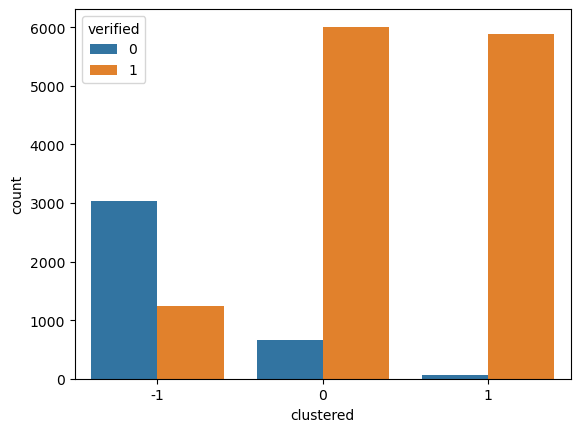

In [34]:
#plot gt_3[clustered] by count hue = verified
sns.countplot(x='commentes', hue='verified', data=gt_3)

In [35]:
#export gt_3 to csv
gt_3.to_csv('data/gt_3.csv', index=False)